In [585]:
import pandas as pd #data cleaning
import numpy as np #numercal data handling
import matplotlib.pyplot as plt #visualization
import seaborn as sns #advanced visualization
from scipy import stats #statistical tests

### **Data Cleaning**

#### **Extract from Excel with Customer**

In [586]:
file_path = 'Bank_Churn_Messy.xlsx'

In [587]:
customer_df = pd.read_excel(file_path,sheet_name=0)
customer_df = pd.DataFrame(customer_df)

In [588]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


#### **CustomerID Type Checking**

In [589]:
customer_df['CustomerId'].dtype

dtype('int64')

In [590]:
customer_df['CustomerId'] = customer_df['CustomerId'].astype('string')

In [591]:
customer_df['CustomerId'].dtype

string[python]

#### **Extract from Excel with Account Info**

In [592]:
account_df = pd.read_excel(file_path, sheet_name=1)
account_df = pd.DataFrame(account_df)

In [593]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [594]:
account_df['CustomerId'].dtype

dtype('int64')

In [595]:
account_df['CustomerId'] = account_df['CustomerId'].astype('string')

In [596]:
account_df['CustomerId'].dtype

string[python]

#### **Merge Data from Account and Customer**

In [597]:
bank_account_df = account_df.merge(customer_df, on='CustomerId', how='left')

In [598]:
bank_account_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [599]:
bank_account_df.describe()

,NumOfProducts,Tenure_x,Exited,CreditScore,Age,Tenure_y
count,10004.000000,10004.000000,10004.000000,10004.000000,10001.000000,10004.000000
mean,1.529988,5.012195,0.203719,650.568073,38.919108,5.012195
std,0.581635,2.891806,0.402782,96.665531,10.488725,2.891806
min,1.000000,0.000000,0.000000,350.000000,18.000000,0.000000
25%,1.000000,3.000000,0.000000,584.000000,32.000000,3.000000
50%,1.000000,5.000000,0.000000,652.000000,37.000000,5.000000
75%,2.000000,7.000000,0.000000,718.000000,44.000000,7.000000
max,4.000000,10.000000,1.000000,850.000000,92.000000,10.000000


In [600]:
bank_account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  string 
 1   Balance          10004 non-null  object 
 2   NumOfProducts    10004 non-null  int64  
 3   HasCrCard        10004 non-null  object 
 4   Tenure_x         10004 non-null  int64  
 5   IsActiveMember   10004 non-null  object 
 6   Exited           10004 non-null  int64  
 7   Surname          10001 non-null  object 
 8   CreditScore      10004 non-null  int64  
 9   Geography        10004 non-null  object 
 10  Gender           10004 non-null  object 
 11  Age              10001 non-null  float64
 12  Tenure_y         10004 non-null  int64  
 13  EstimatedSalary  10004 non-null  object 
dtypes: float64(1), int64(5), object(7), string(1)
memory usage: 1.1+ MB


In [601]:
bank_account_df.value_counts

<bound method DataFrame.value_counts of       CustomerId     Balance  NumOfProducts HasCrCard  Tenure_x  \
0       15634602        €0.0              1       Yes         2   
1       15634602        €0.0              1       Yes         2   
2       15647311   €83807.86              1       Yes         1   
3       15619304   €159660.8              3        No         8   
4       15701354        €0.0              2        No         1   
...          ...         ...            ...       ...       ...   
9999    15682355   €75075.31              2        No         3   
10000   15628319  €130142.79              1        No         4   
10001   15628319  €130142.79              1        No         4   
10002   15628319  €130142.79              1        No         4   
10003   15628319  €130142.79              1        No         4   

      IsActiveMember  Exited    Surname  CreditScore Geography  Gender   Age  \
0                Yes       1   Hargrave          619       FRA  Female  42.

#### **Check Duplicate**

In [602]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [603]:
bank_account_df = bank_account_df.drop_duplicates()

In [604]:
bank_account_df[bank_account_df.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary


In [605]:
bank_account_df['CustomerId'].value_counts

<bound method IndexOpsMixin.value_counts of 0        15634602
2        15647311
3        15619304
4        15701354
5        15737888
           ...   
9996     15606229
9997     15569892
9998     15584532
9999     15682355
10000    15628319
Name: CustomerId, Length: 10000, dtype: string>

In [606]:
bank_account_df.columns = bank_account_df.columns.str.strip().str.lower().str.replace(' ','_')

In [607]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure_y', 'estimatedsalary'],
      dtype='object')

In [608]:
(bank_account_df['tenure_x'] == bank_account_df['tenure_y']).unique()

array([ True])

In [609]:
bank_account_df = bank_account_df.copy()
bank_account_df.drop(columns='tenure_y',errors='ignore',inplace=True)

In [610]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure_x',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

In [611]:
bank_account_df = bank_account_df.rename(columns={'tenure_x':'tenure'})

In [612]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary'],
      dtype='object')

In [613]:
bank_account_df.dtypes

customerid         string[python]
balance                    object
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary            object
dtype: object

In [614]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [615]:
bank_account_df['balance']

0              €0.0
2         €83807.86
3         €159660.8
4              €0.0
5        €125510.82
            ...    
9996           €0.0
9997      €57369.61
9998           €0.0
9999      €75075.31
10000    €130142.79
Name: balance, Length: 10000, dtype: object

In [616]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype('string')

In [617]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].replace(r'[€,]','',regex=True)

In [618]:
bank_account_df[['estimatedsalary','balance']] = bank_account_df[['estimatedsalary','balance']].astype('float64')

In [619]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                  object
tenure                      int64
isactivemember             object
exited                      int64
surname                    object
creditscore                 int64
geography                  object
gender                     object
age                       float64
estimatedsalary           float64
dtype: object

In [620]:
bank_account_df['hascrcard'].unique()

array(['Yes', 'No'], dtype=object)

In [621]:
bank_account_df['isactivemember'].unique()

array(['Yes', 'No'], dtype=object)

In [622]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('string')

In [623]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].replace({'Yes':'1','No':'0'})

In [624]:
bank_account_df[['hascrcard','isactivemember']] = bank_account_df[['hascrcard','isactivemember']].astype('int64')

In [625]:
bank_account_df[['geography','gender']] = bank_account_df[['geography','gender']].astype('string')

In [626]:
bank_account_df['geography'] = bank_account_df['geography'].str.lower().str.strip()
bank_account_df['gender'] = bank_account_df['gender'].str.lower().str.strip()

In [627]:
for index, row in bank_account_df.iterrows():
    bank_account_df.at[index, 'geography'] = row['geography'].strip().lower()
    bank_account_df.at[index, 'gender'] = row['gender'].strip().lower()


In [628]:
bank_account_df.dtypes

customerid         string[python]
balance                   float64
numofproducts               int64
hascrcard                   int64
tenure                      int64
isactivemember              int64
exited                      int64
surname                    object
creditscore                 int64
geography          string[python]
gender             string[python]
age                       float64
estimatedsalary           float64
dtype: object

In [629]:
bank_account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  string 
 1   balance          10000 non-null  float64
 2   numofproducts    10000 non-null  int64  
 3   hascrcard        10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   isactivemember   10000 non-null  int64  
 6   exited           10000 non-null  int64  
 7   surname          9997 non-null   object 
 8   creditscore      10000 non-null  int64  
 9   geography        10000 non-null  string 
 10  gender           10000 non-null  string 
 11  age              9997 non-null   float64
 12  estimatedsalary  10000 non-null  float64
dtypes: float64(3), int64(6), object(1), string(3)
memory usage: 1.3+ MB


In [630]:
bank_account_df.map(type).nunique()

customerid         1
balance            1
numofproducts      1
hascrcard          1
tenure             1
isactivemember     1
exited             1
surname            2
creditscore        1
geography          1
gender             1
age                1
estimatedsalary    1
dtype: int64

In [631]:
bank_account_df.isnull().sum()

customerid         0
balance            0
numofproducts      0
hascrcard          0
tenure             0
isactivemember     0
exited             0
surname            3
creditscore        0
geography          0
gender             0
age                3
estimatedsalary    0
dtype: int64

In [632]:
bank_account_df[bank_account_df['age'].isnull()]

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary
29,15728693,141349.43,1,1,3,1,0,NaN,574,germany,female,NaN,-999999.0
122,15580203,120193.42,1,0,6,0,0,NaN,674,spain,male,NaN,-999999.0
9390,15756954,0.00,1,1,2,1,0,NaN,538,france,female,NaN,-999999.0


In [633]:
bank_account_df['age'] = bank_account_df['age'].fillna(bank_account_df['age'].mean())

In [634]:
bank_account_df['surname'] = bank_account_df['surname'].fillna(bank_account_df['surname'].mode()[0])

In [635]:
bank_account_df.isnull().sum()

customerid         0
balance            0
numofproducts      0
hascrcard          0
tenure             0
isactivemember     0
exited             0
surname            0
creditscore        0
geography          0
gender             0
age                0
estimatedsalary    0
dtype: int64

In [636]:
bank_account_df['age'] = bank_account_df['age'].astype('int64')

In [637]:
#bank_account_df = bank_account_df.drop(columns=['customerid','surname'])

In [638]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary
0,15634602,0.00,1,1,2,1,1,Hargrave,619,fra,female,42,101348.88
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,female,41,112542.58
3,15619304,159660.80,3,0,8,0,1,Onio,502,french,female,42,113931.57
4,15701354,0.00,2,0,1,0,0,Boni,699,fra,female,39,93826.63
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,female,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,male,39,96270.64
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,french,male,35,101699.77
9998,15584532,0.00,1,1,7,1,1,Liu,709,fra,female,36,42085.58
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,male,42,92888.52


In [639]:
bank_account_df['geography'].unique()

<StringArray>
['fra', 'spain', 'french', 'france', 'germany']
Length: 5, dtype: string

In [640]:
bank_account_df['geography'] = bank_account_df['geography'].replace(['fra','french'],'france')

In [641]:
bank_account_df['geography'].unique()

<StringArray>
['france', 'spain', 'germany']
Length: 3, dtype: string

In [642]:
bank_account_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,0.515100,5.012800,0.515100,0.203700,650.528800,38.921800,99762.195289
std,62397.405202,0.581654,0.499797,2.892174,0.499797,0.402769,96.653299,10.487511,60583.863580
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,-999999.000000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.000000,32.000000,50910.677500
50%,97198.540000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,37.000000,100191.725000
75%,127644.240000,2.000000,1.000000,7.000000,1.000000,0.000000,718.000000,44.000000,149388.247500
max,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,92.000000,199992.480000


In [643]:
62397.405202/76485.889288

0.8158028334749274

There are 30% no-savings customers and savings customers' balance behaviours are stable. To study difference between no-savings and savings customers. While most customers used only 1 or 2 products, few customers only used more than 2 products. Credit card is direct related with is activemember. To increase more engagement, we should provide credit card plan. Most customers are long term customers around 5 years and longest term is 10 year old customers. New customers like 0 and oldest customers like 10 is quite few. 20% customers are churner so we need to explore why churn. There are few customers with worst credit score. There are around 6% customers who have below 500 credit score, among them 30% of low credit score customers have higher income and saving. We can approve loan using strict policies to prevent churn customers. Our target customer is around 32 to 44, expanded range is 24 - 60. Customer age do not impact on saving. 74% of customers' income is around 50k to 2lakhs, 14% of cusomters' income is 20k to 50k. Below 20k is around 10% of customers. So, most of customers' income range is 20k to 2lakhs. 50% of customers located in French and each 25% of customers exist in Spain and Germany.

In [644]:
bank_account_df['geography'].value_counts(normalize=True)

geography
france     0.5014
germany    0.2509
spain      0.2477
Name: proportion, dtype: Float64

In [645]:
bank_account_df['gender'].value_counts()

gender
male      5457
female    4543
Name: count, dtype: Int64

In [646]:
bank_account_df['age_group'] = pd.cut(bank_account_df['age'],bins=[17,20,23,31,44,60,120],labels=['18-20','21-23','24-31','32-44','45-60','above 60'])
bank_account_df['age_group'].value_counts()

age_group
32-44       5288
24-31       2047
45-60       1876
above 60     464
21-23        236
18-20         89
Name: count, dtype: int64

In [647]:
bank_account_df.groupby('age_group',observed=False)['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
18-20,89.0,75133.200225,66083.923154,0.0,0.0,95830.430,130274.2200,204223.03
21-23,236.0,74272.915720,63940.916416,0.0,0.0,93534.715,123667.4275,210433.08
24-31,2047.0,73445.682990,62737.121443,0.0,0.0,93577.300,126921.8100,214346.96
32-44,5288.0,76142.755187,62666.098680,0.0,0.0,96701.365,127827.3325,250898.09
45-60,1876.0,81296.835133,60846.140150,0.0,0.0,102282.695,127960.8850,238387.56
above 60,464.0,75742.596401,61723.147097,0.0,0.0,96557.230,126681.1050,187013.13


In [648]:
bank_account_df[bank_account_df['estimatedsalary']<=20000].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,71853.599565,1.527806,0.522750,4.993933,0.522750,0.200202,649.119312,38.640040,6756.849414
std,63056.254081,0.580107,0.499735,2.862568,0.499735,0.400354,98.353520,10.355026,55863.049472
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,395.000000,18.000000,-999999.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,579.000000,31.000000,4595.050000
50%,91443.750000,1.000000,1.000000,5.000000,1.000000,0.000000,648.000000,37.000000,9677.000000
75%,126224.870000,2.000000,1.000000,7.000000,1.000000,0.000000,716.000000,43.000000,14679.810000
max,206663.750000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,77.000000,19998.310000


In [649]:
bank_account_df['estimatedsalary_group'] = pd.cut(bank_account_df['estimatedsalary'],bins=[0,1000,20000,50000,100000,150000,200000,400000],labels=['below 1k','1k-20k','20k-50k','50k-100k','100k-150k','150k-200k','above 200k'])
bank_account_df['estimatedsalary_group'].value_counts()

estimatedsalary_group
100k-150k     2553
50k-100k      2536
150k-200k     2455
20k-50k       1467
1k-20k         927
below 1k        59
above 200k       0
Name: count, dtype: int64

In [650]:
bank_account_df[bank_account_df['balance']==0]['age_group'].value_counts(normalize=True)

age_group
32-44       0.535250
24-31       0.217584
45-60       0.165883
above 60    0.046171
21-23       0.025159
18-20       0.009953
Name: proportion, dtype: float64

In [651]:
bank_account_df[bank_account_df['creditscore']<500].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,80294.231329,1.515823,0.468354,5.077532,0.468354,0.237342,462.925633,38.908228,103307.478418
std,62792.369008,0.579417,0.499393,2.824839,0.499393,0.425790,30.113033,10.265777,57842.565848
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,878.870000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,445.000000,32.000000,56598.880000
50%,100697.760000,1.000000,0.000000,5.000000,0.000000,0.000000,470.000000,37.000000,101297.595000
75%,131097.260000,2.000000,1.000000,8.000000,1.000000,0.000000,487.000000,44.000000,155828.382500
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,499.000000,84.000000,199505.530000


In [652]:
bank_account_df[(bank_account_df['balance']>=100000) & 
                (bank_account_df['estimatedsalary']>=100000) & 
                (bank_account_df['creditscore']<=500)
                ].describe()


,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,135248.328982,1.461078,0.413174,5.161677,0.413174,0.227545,462.784431,39.203593,153429.581737
std,23139.782088,0.598678,0.493884,2.929528,0.493884,0.420508,33.468763,10.964092,28450.370264
min,100374.580000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,19.000000,100447.530000
25%,117202.445000,1.000000,0.000000,2.000000,0.000000,0.000000,450.500000,32.000000,128002.440000
50%,131286.460000,1.000000,0.000000,6.000000,0.000000,0.000000,470.000000,37.000000,154360.970000
75%,151920.915000,2.000000,1.000000,8.000000,1.000000,0.000000,487.500000,45.000000,177213.265000
max,221532.800000,4.000000,1.000000,10.000000,1.000000,1.000000,500.000000,74.000000,198714.290000


In [653]:
bank_account_df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='Count'>

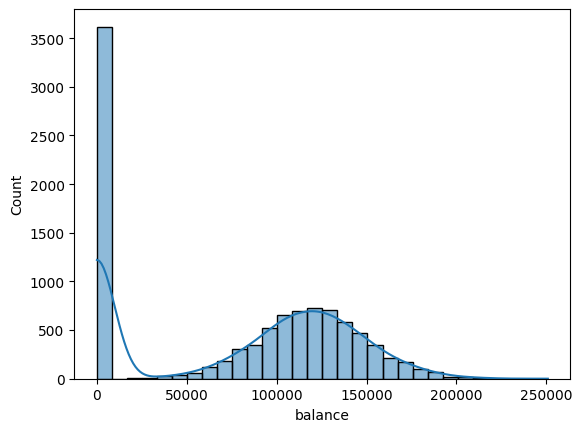

In [654]:
sns.histplot(data=bank_account_df,x='balance',bins=30,kde=True)

In [655]:
bank_account_df['hascrcard'].value_counts(normalize=True)

hascrcard
1    0.5151
0    0.4849
Name: proportion, dtype: float64

In [656]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['isactivemember'],rownames=['Has Credit Card'],colnames=['Active Status'])

Active Status,0,1
Has Credit Card,,
0,4849,0
1,0,5151


In [657]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,3547,1302
1,4416,735


In [658]:
bank_account_df[(bank_account_df['hascrcard']==0) &
                (bank_account_df['exited']==0)].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,3547.000000,3547.000000,3547.0,3547.000000,3547.0,3547.0,3547.000000,3547.000000,3547.000000
mean,72048.820578,1.554835,0.0,5.127995,0.0,0.0,648.914576,35.471384,100032.467677
std,63296.862186,0.507164,0.0,2.864484,0.0,0.0,96.216094,7.146597,60324.672738
min,0.000000,1.000000,0.0,0.000000,0.0,0.0,408.000000,18.000000,-999999.000000
25%,0.000000,1.000000,0.0,3.000000,0.0,0.0,582.500000,31.000000,50839.820000
50%,91835.160000,2.000000,0.0,5.000000,0.0,0.0,650.000000,35.000000,100153.430000
75%,127043.255000,2.000000,0.0,8.000000,0.0,0.0,716.000000,40.000000,148900.145000
max,221532.800000,3.000000,0.0,10.000000,0.0,0.0,850.000000,77.000000,199992.480000


In [659]:
potential_active_customers = bank_account_df[(bank_account_df['hascrcard']==0) &
                (bank_account_df['exited']==0) & 
                (bank_account_df['creditscore']>=700) &
                (bank_account_df['estimatedsalary']>=100000) &
                (bank_account_df['balance']>=100000)
                ]

In [660]:
(len(potential_active_customers)/len(bank_account_df))*100

2.4299999999999997

In [661]:
pd.crosstab(potential_active_customers['geography'],potential_active_customers['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,42,74
germany,50,37
spain,17,23


***Valuable Insight to add StreamLit***

We can improve **active rate** by providing **credit card** to this 2.4% customers who have high credit score, saving and income. Credit card and active member has direct correlation. We need to target France and Germany which were most potential customers exists. In France, male potential customers are more than female and in Germay, female cusomters are more. It can be valuable for marketing team, key account teams for credit card campaign.

In [662]:
no_saving_customer_df = bank_account_df[bank_account_df['balance']==0]
saving_customer_df = bank_account_df[bank_account_df['balance']>0]

In [663]:
pd.crosstab(bank_account_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn'])

Churn,0,1
Has Credit Card,,
0,3547,1302
1,4416,735


In [664]:
pd.crosstab(no_saving_customer_df['hascrcard'],bank_account_df['exited'],rownames=['Has Credit Card'],colnames=['Churn Status'])

Churn Status,0,1
Has Credit Card,,
0,1424,320
1,1693,180


In [665]:
potential_customers = no_saving_customer_df[(no_saving_customer_df['creditscore']>=700) &
                      (no_saving_customer_df['estimatedsalary']<=100000) &
                      (no_saving_customer_df['exited']==0)
                      ]

In [666]:
potential_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,500.0,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.00000
mean,0.0,1.836000,0.552000,5.186000,0.552000,0.0,759.546000,37.376000,49395.09604
std,0.0,0.416474,0.497787,2.842457,0.497787,0.0,45.088867,10.747541,29056.68281
min,0.0,1.000000,0.000000,0.000000,0.000000,0.0,700.000000,18.000000,96.27000
25%,0.0,2.000000,0.000000,3.000000,0.000000,0.0,719.000000,31.000000,24603.32750
50%,0.0,2.000000,1.000000,5.000000,1.000000,0.0,750.000000,36.000000,48991.39000
75%,0.0,2.000000,1.000000,8.000000,1.000000,0.0,790.000000,41.000000,72951.46500
max,0.0,3.000000,1.000000,10.000000,1.000000,0.0,850.000000,81.000000,99661.46000


In [667]:
potential_customers['age_group'].value_counts()

age_group
32-44       294
24-31       114
45-60        42
above 60     29
21-23        13
18-20         8
Name: count, dtype: int64

Among no saving customers, there are over 10% of potential customers around 480 who have high credite score and good income by offering saving plan and there are also 50% of potential customers don't have credit card. By providing credit crad, increase engagment and saving. Their age segments are 24-60 similar to overall cutomer age segment. It is better if we get customers demographic and jobs like self-employed or company-employee and their company. We can provide more valuable and specific customer segment to marketing team. Our potential customers exist in Franch and Spain for offering localized program. 

In [668]:
no_saving_customer_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,3617.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,0.0,1.784628,0.517832,5.071330,0.517832,0.138236,649.452861,38.436550,98684.933743
std,0.0,0.496455,0.499751,2.860781,0.499751,0.345195,96.158798,10.491459,60553.003860
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,-999999.000000
25%,0.0,1.000000,0.000000,3.000000,0.000000,0.000000,583.000000,31.000000,49463.440000
50%,0.0,2.000000,1.000000,5.000000,1.000000,0.000000,651.000000,37.000000,98618.790000
75%,0.0,2.000000,1.000000,7.000000,1.000000,0.000000,717.000000,43.000000,148330.970000
max,0.0,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,88.000000,199992.480000


In [669]:
saving_customer_df.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,119827.493793,1.386025,0.513552,4.979633,0.513552,0.240796,651.138493,39.196773,100372.637872
std,30095.056462,0.577011,0.499855,2.909514,0.499855,0.427600,96.934609,10.476121,60597.584975
min,3768.690000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,-999999.000000
25%,100181.975000,1.000000,0.000000,2.000000,0.000000,0.000000,584.000000,32.000000,51699.250000
50%,119839.690000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,38.000000,101139.300000
75%,139512.290000,2.000000,1.000000,8.000000,1.000000,0.000000,718.000000,44.000000,149596.615000
max,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,92.000000,199970.740000


In [670]:
potential_customers['geography'].value_counts()

geography
france    320
spain     180
Name: count, dtype: Int64

In [671]:
potential_customers['gender'].value_counts()

gender
male      285
female    215
Name: count, dtype: Int64

In [672]:
strong_engagement_customers = bank_account_df[(bank_account_df['creditscore']>=700)
                                              & (bank_account_df['balance']>=100000)
                                              & (bank_account_df['estimatedsalary']>=100000)
                                              & (bank_account_df['exited']==0)
                                              & (bank_account_df['isactivemember']==1)]
strong_engagement_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,341.000000,341.000000,341.0,341.000000,341.0,341.0,341.000000,341.000000,341.000000
mean,133306.528886,1.372434,1.0,4.868035,1.0,0.0,763.290323,38.457478,149923.115748
std,21947.339097,0.490201,0.0,2.968988,0.0,0.0,43.960017,11.621055,29257.916676
min,100476.460000,1.000000,1.0,0.000000,1.0,0.0,700.000000,18.000000,100127.710000
25%,117265.210000,1.000000,1.0,2.000000,1.0,0.0,726.000000,31.000000,125782.290000
50%,129164.880000,1.000000,1.0,5.000000,1.0,0.0,756.000000,37.000000,148977.720000
75%,146652.010000,2.000000,1.0,7.000000,1.0,0.0,795.000000,42.000000,175398.340000
max,191523.090000,3.000000,1.0,10.000000,1.0,0.0,850.000000,92.000000,199841.320000


In [673]:
pd.crosstab(strong_engagement_customers['geography'],strong_engagement_customers['gender'])

gender,female,male
geography,,
france,57,93
germany,43,69
spain,35,44


In [674]:
len(strong_engagement_customers)/len(bank_account_df)

0.0341

In [675]:
pd.crosstab(strong_engagement_customers['age_group'],strong_engagement_customers['geography'])

geography,france,germany,spain
age_group,,,
18-20,2,2,1
21-23,6,2,3
24-31,30,25,16
32-44,82,67,43
45-60,15,11,11
above 60,15,5,5


In [676]:
bank_account_df.groupby('gender').count()

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,age,estimatedsalary,age_group,estimatedsalary_group
gender,,,,,,,,,,,,,,
female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4541
male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5456


In [677]:
bank_account_df['gender'].value_counts()

gender
male      5457
female    4543
Name: count, dtype: Int64

In [678]:
revenue_lost_customers = bank_account_df[(bank_account_df['creditscore']>=700)
                                              & (bank_account_df['balance']>=100000)
                                              & (bank_account_df['estimatedsalary']>=100000)
                                              & (bank_account_df['exited']==1)
                                              & (bank_account_df['isactivemember']==1)]
revenue_lost_customers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,65.000000,65.000000,65.0,65.000000,65.0,65.0,65.000000,65.000000,65.000000
mean,130761.184308,1.630769,1.0,5.323077,1.0,1.0,758.800000,44.338462,148781.910000
std,22617.229949,0.911202,0.0,3.182509,0.0,0.0,41.065953,10.127742,27787.042654
min,102703.620000,1.000000,1.0,0.000000,1.0,1.0,700.000000,26.000000,100720.020000
25%,113709.280000,1.000000,1.0,2.000000,1.0,1.0,727.000000,36.000000,128521.160000
50%,124954.940000,1.000000,1.0,6.000000,1.0,1.0,749.000000,45.000000,148412.240000
75%,141252.180000,2.000000,1.0,8.000000,1.0,1.0,779.000000,50.000000,170454.930000
max,209490.210000,4.000000,1.0,10.000000,1.0,1.0,850.000000,69.000000,199693.840000


In [679]:
pd.crosstab(revenue_lost_customers['geography'],revenue_lost_customers['gender'])

gender,female,male
geography,,
france,7,6
germany,19,25
spain,7,1


In [680]:
pd.crosstab(revenue_lost_customers['age_group'],revenue_lost_customers['geography'])

geography,france,germany,spain
age_group,,,
24-31,2,4,1
32-44,5,17,2
45-60,5,21,4
above 60,1,2,1


In [681]:
len(revenue_lost_customers)/len(bank_account_df)

0.0065

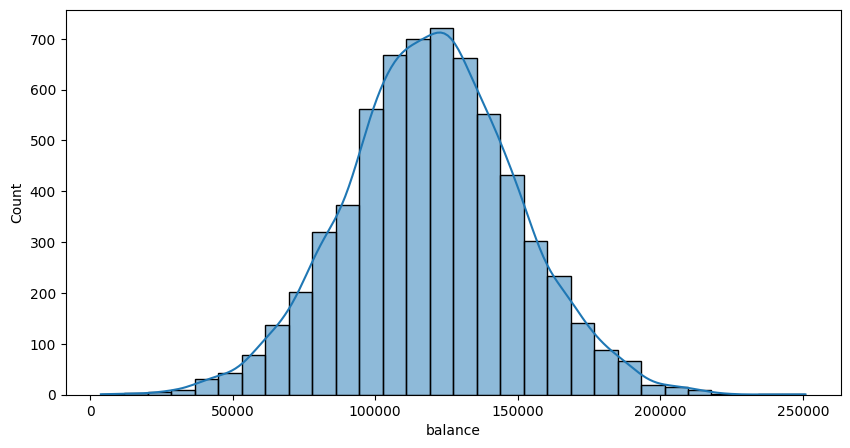

In [682]:
plt.figure(figsize=(10,5))
sns.histplot(saving_customer_df,x='balance',bins=30,kde=True)
plt.show()

In [683]:
saving_customer_df.groupby('geography')['balance'].describe().T

geography,france,germany,spain
count,2596.000000,2509.000000,1278.000000
mean,119927.765597,119730.116134,119814.985923
std,31732.792620,27022.006157,32342.692736
min,3768.690000,27288.430000,12459.190000
25%,98440.985000,102800.720000,98066.692500
50%,120135.155000,119703.100000,119726.450000
75%,141143.112500,137560.380000,140342.130000
max,238387.560000,214346.960000,250898.090000


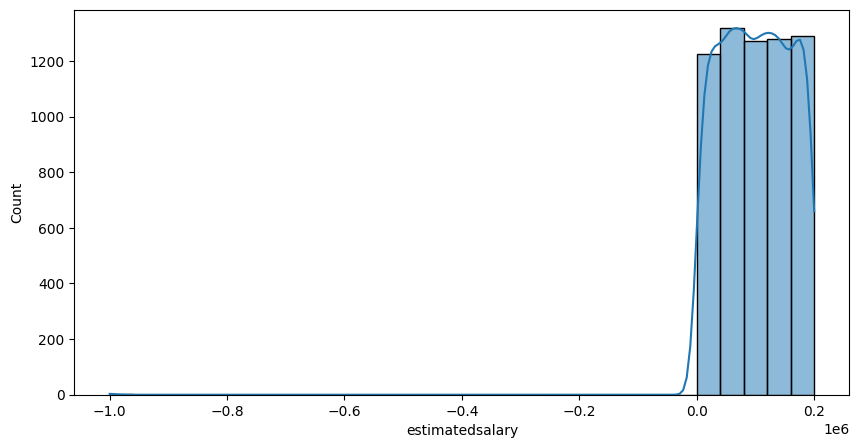

In [684]:
plt.figure(figsize=(10,5))
sns.histplot(saving_customer_df,x='estimatedsalary',bins=30,kde=True)
plt.show()

There are no different saving behaviour and income behavior on geography and gender. Saving customers have consistant saving range although they don't have same income behaviour. Different customers have different income have flat different income.

Most of customers save between 50000 and 200000. There are few customers who saved more than 200000.

In [685]:
saving_customer_df[(saving_customer_df['hascrcard']==0) & (saving_customer_df['exited']==0)].describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,2123.000000,2123.000000,2123.0,2123.000000,2123.0,2123.0,2123.000000,2123.000000,2123.000000
mean,120375.490622,1.367405,0.0,5.128592,0.0,0.0,649.517664,35.595384,100782.151423
std,29580.769070,0.486105,0.0,2.860888,0.0,0.0,96.783385,7.156242,62142.109431
min,14262.800000,1.000000,0.0,0.000000,0.0,0.0,410.000000,18.000000,-999999.000000
25%,99792.980000,1.000000,0.0,3.000000,0.0,0.0,583.000000,31.000000,53480.625000
50%,120549.290000,1.000000,0.0,5.000000,0.0,0.0,651.000000,35.000000,100564.370000
75%,139923.690000,2.000000,0.0,8.000000,0.0,0.0,717.000000,40.000000,149259.710000
max,221532.800000,3.000000,0.0,10.000000,0.0,0.0,850.000000,77.000000,199970.740000


In [686]:
potential_saving_cutomers = saving_customer_df[(saving_customer_df['balance']>100000) &
                   (saving_customer_df['creditscore']>=700) &
                   (saving_customer_df['estimatedsalary']>=100000) & 
                   (saving_customer_df['hascrcard']==0) &
                   (saving_customer_df['exited']==0)]

In [687]:
potential_saving_cutomers.describe()

,balance,numofproducts,hascrcard,tenure,isactivemember,exited,creditscore,age,estimatedsalary
count,243.000000,243.000000,243.0,243.000000,243.0,243.0,243.000000,243.000000,243.000000
mean,130852.710576,1.349794,0.0,5.045267,0.0,0.0,760.777778,36.094650,151929.929630
std,20663.477546,0.486459,0.0,2.818550,0.0,0.0,45.218569,7.638209,29394.290828
min,100054.770000,1.000000,0.0,0.000000,0.0,0.0,700.000000,18.000000,100137.700000
25%,115011.695000,1.000000,0.0,3.000000,0.0,0.0,722.000000,31.000000,125683.170000
50%,126875.620000,1.000000,0.0,5.000000,0.0,0.0,756.000000,36.000000,152039.670000
75%,144389.910000,2.000000,0.0,7.000000,0.0,0.0,788.000000,41.000000,177038.145000
max,191775.650000,3.000000,0.0,10.000000,0.0,0.0,850.000000,68.000000,199484.960000


In [688]:
potential_saving_cutomers['geography'].value_counts(normalize=True)

geography
france     0.477366
germany    0.358025
spain      0.164609
Name: proportion, dtype: Float64

In [689]:
potential_saving_cutomers['gender'].value_counts(normalize=True)

gender
male      0.55144
female    0.44856
Name: proportion, dtype: Float64

In [690]:
pd.crosstab(potential_saving_cutomers['geography'],potential_saving_cutomers['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,42,74
germany,50,37
spain,17,23


In saving customers, there are 364 customers who have high balance, credit score and estimated salaries. Most of customers located in France and Germany. In France and Spain, there are higher male customers even though female customers are higher in Germany. Market Teams should provide credit plan based on targeted area and specific gendre to increase engagement and retention rate.

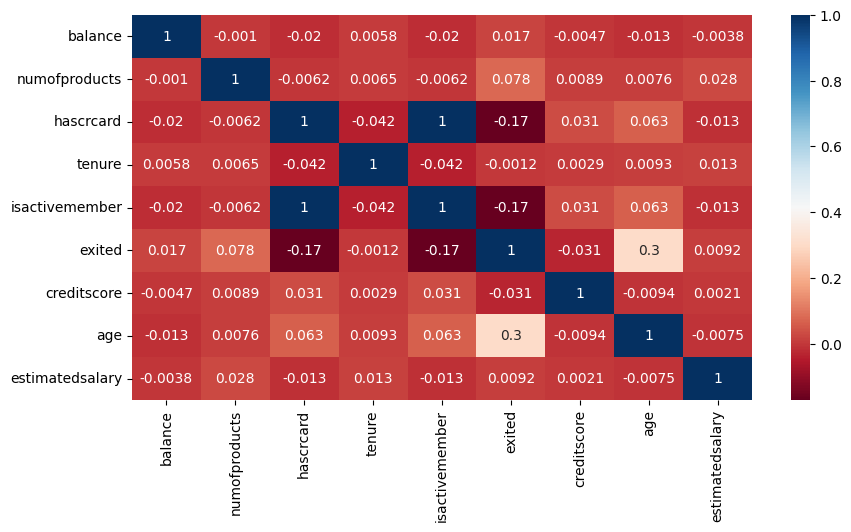

In [691]:
numerical_columns = saving_customer_df.select_dtypes(include=np.number).columns
saving_customer_corr = saving_customer_df[numerical_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(saving_customer_corr,annot=True,cmap='RdBu')
plt.show()

In [692]:

numerical_columns

Index(['balance', 'numofproducts', 'hascrcard', 'tenure', 'isactivemember',
       'exited', 'creditscore', 'age', 'estimatedsalary'],
      dtype='object')

In [693]:
pd.crosstab(saving_customer_df['age_group'],saving_customer_df['exited'],rownames=['Age_Group'],colnames=['Churn'],normalize='index')*100

Churn,0,1
Age_Group,,
18-20,94.339623,5.660377
21-23,88.965517,11.034483
24-31,90.396825,9.603175
32-44,81.682578,18.317422
45-60,45.768025,54.231975
above 60,69.360269,30.639731


In [694]:
saving_customer_df.groupby('exited').describe().T.style.set_sticky()

Saving amount, income of churner customers are higher than non-churner. In credit-score, churners are lower than non churners. Age 40 60 customers are more likely to issue our bank. So marketing team should provide to them offer plan related with credit wcard and restrict loan plan to potnetial customers. Customer duration is not relevant with chrun.

In [695]:
bank_account_df['saving'] = bank_account_df['balance'].apply(lambda x: 1 if x>0 else 0)

In [696]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary,age_group,estimatedsalary_group,saving
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,female,42,101348.88,32-44,100k-150k,0
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,female,41,112542.58,32-44,100k-150k,1
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,female,42,113931.57,32-44,100k-150k,1
4,15701354,0.00,2,0,1,0,0,Boni,699,france,female,39,93826.63,32-44,50k-100k,0
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,female,43,79084.10,32-44,50k-100k,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,male,39,96270.64,32-44,50k-100k,0
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,male,35,101699.77,32-44,100k-150k,1
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,female,36,42085.58,32-44,20k-50k,0
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,male,42,92888.52,32-44,50k-100k,1


In [697]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'age_group',
       'estimatedsalary_group', 'saving'],
      dtype='object')

<Axes: xlabel='balance', ylabel='Count'>

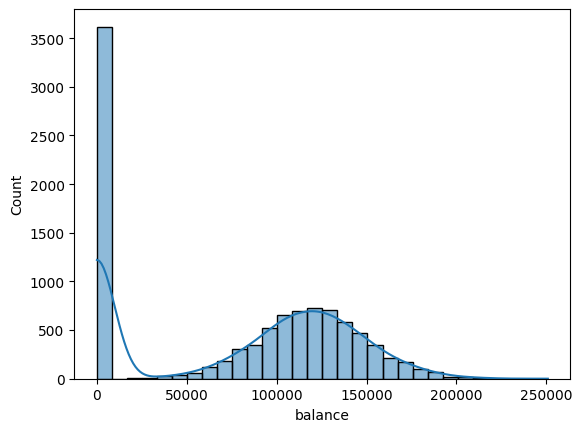

In [698]:
sns.histplot(bank_account_df['balance'],bins=30,kde=True)

In [699]:
bank_account_df['saving_group'] = pd.cut(bank_account_df['balance'], bins=[-1,0,50000,100000,150000,200000,300000],labels=['no saving','below 50k','50k-100k','100k-150k','150k-200k','above 200k'])
bank_account_df['saving_group'].value_counts()

saving_group
100k-150k     3830
no saving     3617
50k-100k      1509
150k-200k      935
below 50k       75
above 200k      34
Name: count, dtype: int64

In [700]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary,age_group,estimatedsalary_group,saving,saving_group
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,female,42,101348.88,32-44,100k-150k,0,no saving
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,female,41,112542.58,32-44,100k-150k,1,50k-100k
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,female,42,113931.57,32-44,100k-150k,1,150k-200k
4,15701354,0.00,2,0,1,0,0,Boni,699,france,female,39,93826.63,32-44,50k-100k,0,no saving
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,female,43,79084.10,32-44,50k-100k,1,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,male,39,96270.64,32-44,50k-100k,0,no saving
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,male,35,101699.77,32-44,100k-150k,1,50k-100k
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,female,36,42085.58,32-44,20k-50k,0,no saving
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,male,42,92888.52,32-44,50k-100k,1,50k-100k


<Axes: xlabel='creditscore', ylabel='Count'>

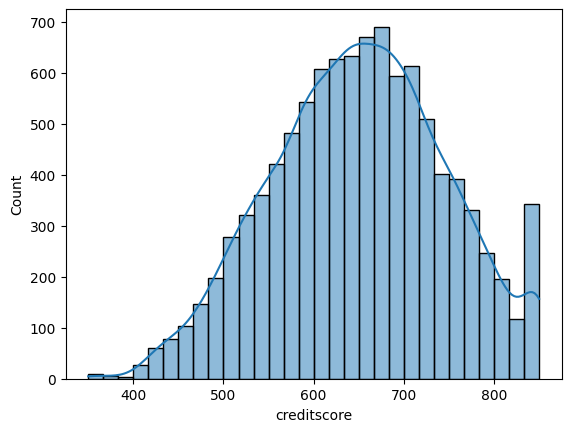

In [701]:
sns.histplot(bank_account_df['creditscore'],bins=30,kde=True)

In [702]:
bank_account_df['creditscore_group'] = pd.cut(bank_account_df['creditscore'],bins=[0,650,700,850],labels=['below 650','650-700','above 700'])

In [703]:
bank_account_df['creditscore_group'].value_counts()

creditscore_group
below 650    4937
above 700    3116
650-700      1947
Name: count, dtype: int64

In [704]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,gender,age,estimatedsalary,age_group,estimatedsalary_group,saving,saving_group,creditscore_group
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,female,42,101348.88,32-44,100k-150k,0,no saving,below 650
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,female,41,112542.58,32-44,100k-150k,1,50k-100k,below 650
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,female,42,113931.57,32-44,100k-150k,1,150k-200k,below 650
4,15701354,0.00,2,0,1,0,0,Boni,699,france,female,39,93826.63,32-44,50k-100k,0,no saving,650-700
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,female,43,79084.10,32-44,50k-100k,1,100k-150k,above 700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,male,39,96270.64,32-44,50k-100k,0,no saving,above 700
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,male,35,101699.77,32-44,100k-150k,1,50k-100k,below 650
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,female,36,42085.58,32-44,20k-50k,0,no saving,above 700
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,male,42,92888.52,32-44,50k-100k,1,50k-100k,above 700


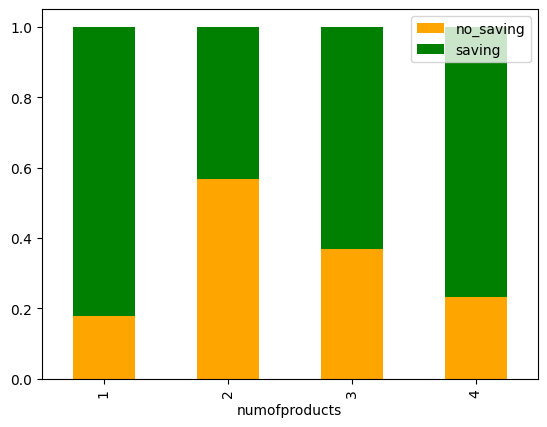

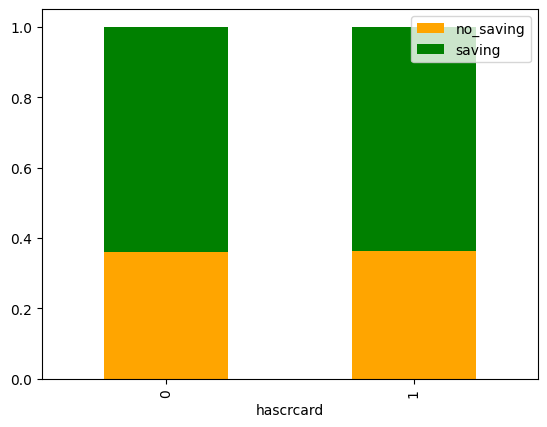

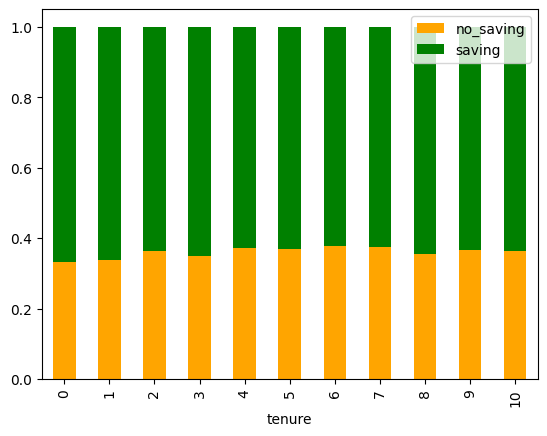

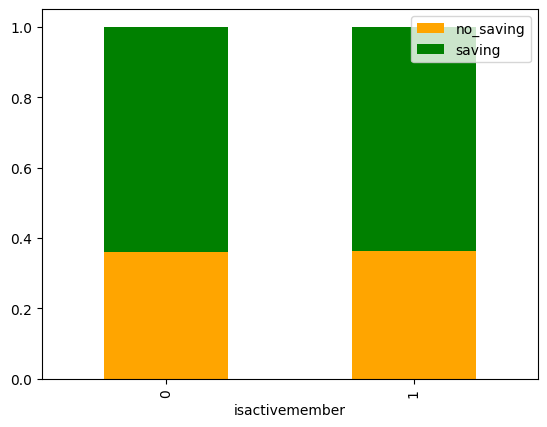

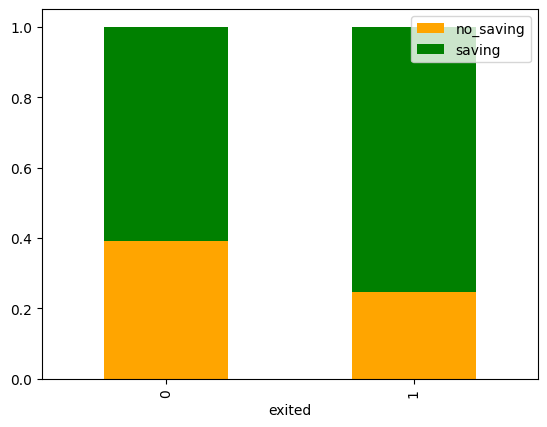

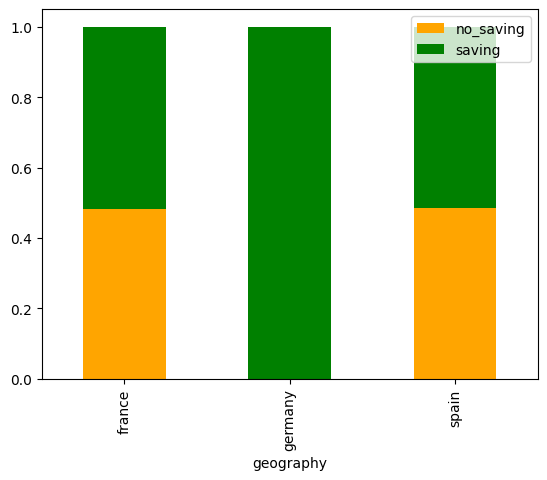

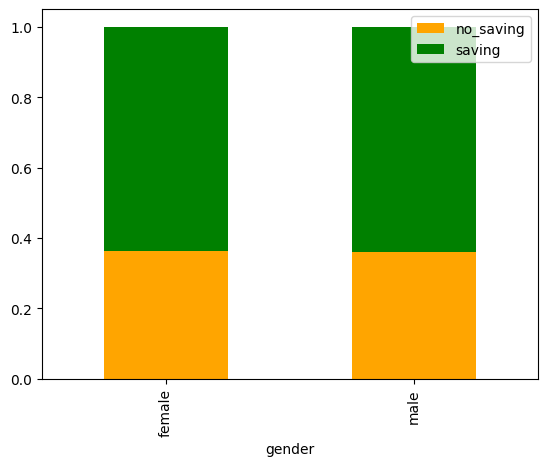

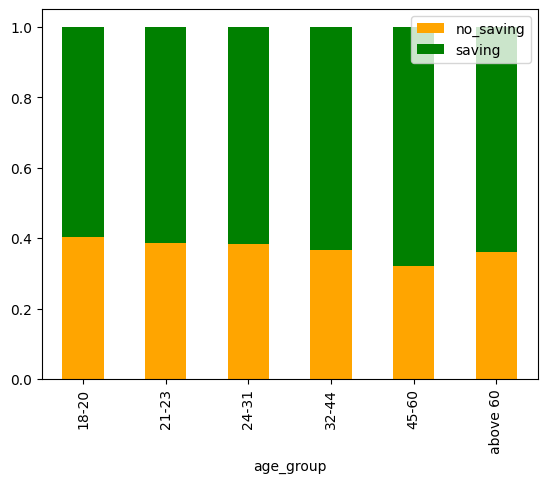

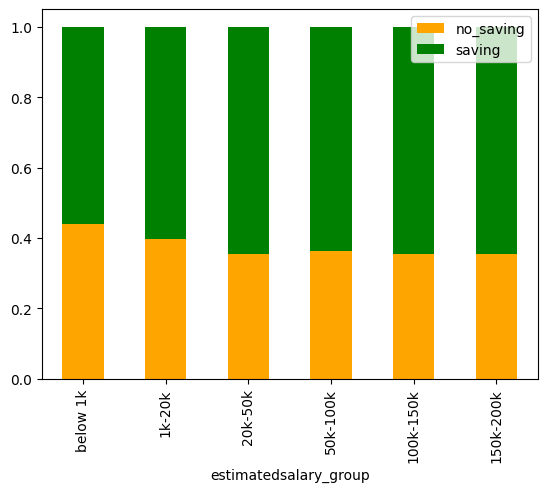

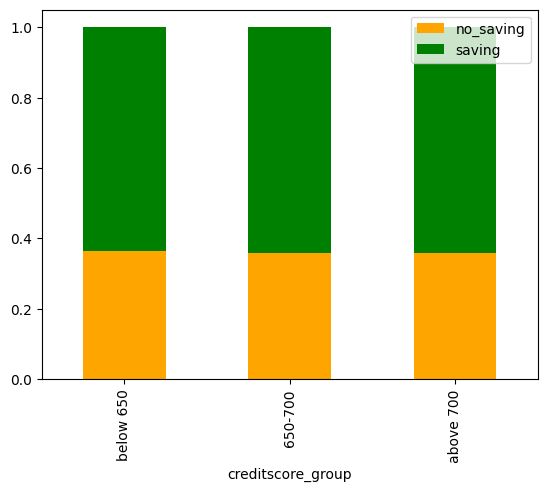

In [705]:
saving_categorical_columns = ['numofproducts', 'hascrcard', 'tenure', 'isactivemember',
       'exited', 'geography', 'gender', 'age_group', 'estimatedsalary_group', 'creditscore_group']
for col in saving_categorical_columns:
    ct = pd.crosstab(bank_account_df[col],bank_account_df['saving'],normalize='index')
    ct.plot(kind='bar',stacked=True,color=['orange','green'])
    plt.legend(loc='upper right',labels=['no_saving','saving'])
    plt.show()

Around 38 percent of France and Spain customers are no saving cutomers and all Germany customers are saving customers.

In [706]:
pd.crosstab(no_saving_customer_df['geography'],no_saving_customer_df['gender'],rownames=['Geography'],colnames=['Gender'])

Gender,female,male
Geography,,
france,1109,1309
spain,545,654


In [707]:
pd.crosstab(bank_account_df['gender'],bank_account_df['numofproducts'])

numofproducts,1,2,3,4
gender,,,,
female,2296,2060,149,38
male,2788,2530,117,22


In [708]:
bank_account_df.groupby('geography').describe().T.style.set_sticky()

Germany customers have higher churn rate than other countries. They have higher salary, saving than another countries customers. We nned to run regreesion test for evaluating which factors more influence on churn.

In [709]:
saving_churn_customer_df = saving_customer_df[saving_customer_df['exited']==1]
saving_non_churn_customer_df = saving_customer_df[saving_customer_df['exited']==0]

<Axes: xlabel='balance', ylabel='Count'>

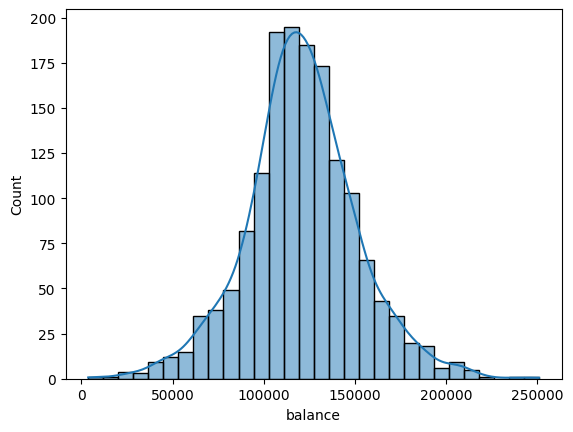

In [710]:
sns.histplot(saving_churn_customer_df,x='balance',bins=30,kde=True)

<Axes: xlabel='balance', ylabel='Count'>

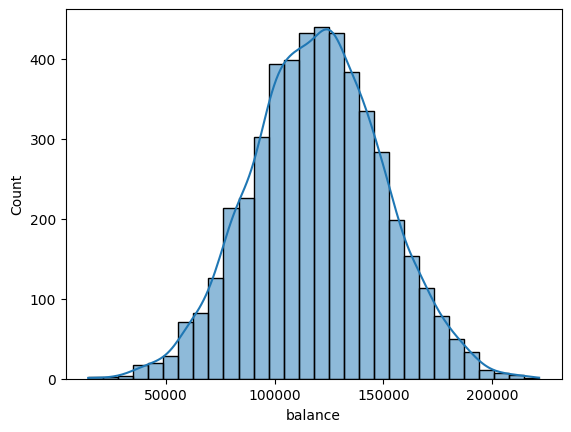

In [711]:
sns.histplot(saving_non_churn_customer_df,x='balance',bins=30,kde=True)

In [712]:
from scipy.stats import levene

saving_churn_customer_df = saving_churn_customer_df['balance'] 
saving_non_churn_customer_df = saving_non_churn_customer_df['balance']
levene_stats, p_val = levene(saving_churn_customer_df,saving_non_churn_customer_df)
print(levene_stats,p_val)

2.9122801343497624 0.08795616785681355


In [713]:
from scipy.stats import ttest_ind
ttest_stats, p_val = ttest_ind(saving_churn_customer_df,saving_non_churn_customer_df)
print(ttest_stats,p_val)

1.374781881782122 0.16924734893322796


According to t test result, saving doesn't impact on churn

In [714]:
income_churn_group = bank_account_df[bank_account_df['exited']==1]['estimatedsalary']
no_income_chrun_group = bank_account_df[bank_account_df['exited']==0]['estimatedsalary']

<Axes: xlabel='estimatedsalary', ylabel='Count'>

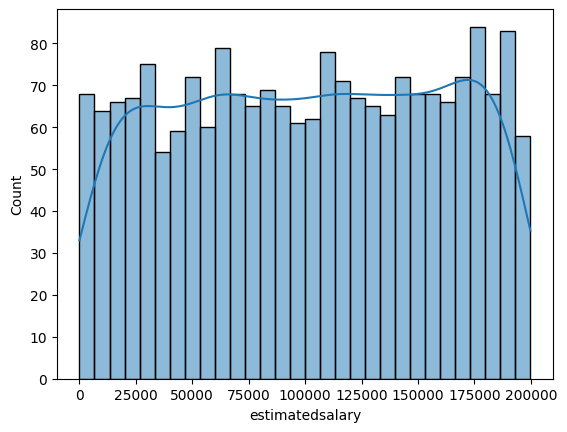

In [715]:
sns.histplot(income_churn_group,bins=30,kde=True)

<Axes: xlabel='estimatedsalary', ylabel='Count'>

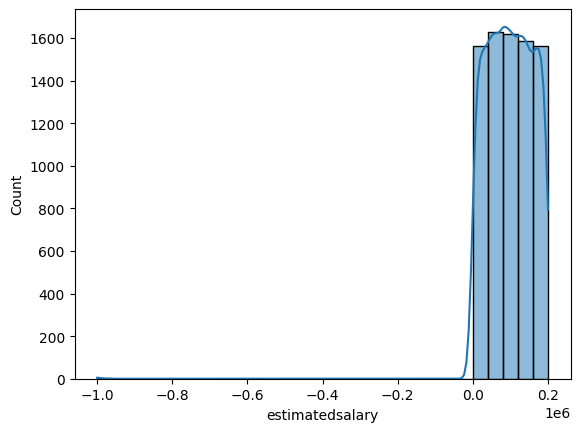

In [716]:
sns.histplot(no_income_chrun_group,bins=30,kde=True)

In [717]:
from scipy.stats import mannwhitneyu
mannwhitneyu_stats, p_val = mannwhitneyu(income_churn_group,no_income_chrun_group,alternative='two-sided')
print(mannwhitneyu_stats,p_val)

8253555.0 0.2179643334918724


In [718]:
bank_account_df.groupby('exited').describe().T.style.set_sticky()

In [719]:
products_churn_group = bank_account_df[bank_account_df['exited']==1]['numofproducts']
non_products_churn_group = bank_account_df[bank_account_df['exited']==0]['numofproducts']

<Axes: xlabel='numofproducts', ylabel='Count'>

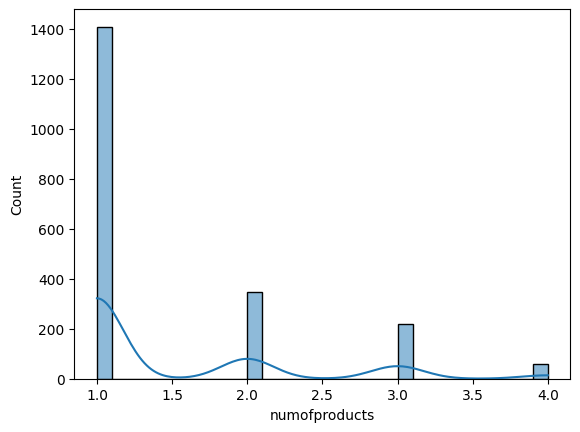

In [720]:
sns.histplot(products_churn_group,bins=30,kde=True)

<Axes: xlabel='numofproducts', ylabel='Count'>

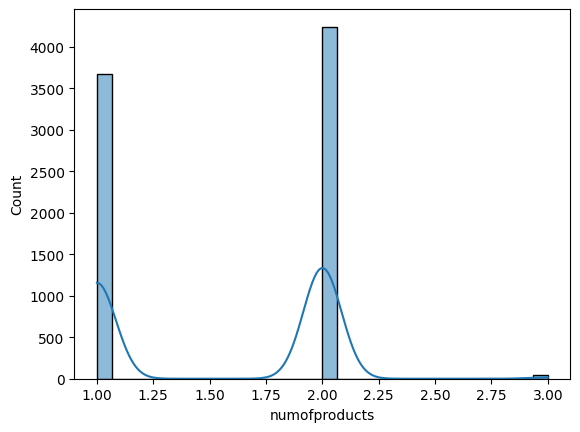

In [721]:
sns.histplot(non_products_churn_group,bins=30,kde=True)

In [722]:
print(mannwhitneyu(products_churn_group,non_products_churn_group,alternative='two-sided'))

MannwhitneyuResult(statistic=np.float64(6830625.5), pvalue=np.float64(5.275105212817194e-36))


There are number of products have significant difference between churner and non_churner. Customers who hold more than 2 products, they are more likely to churn.

<Axes: xlabel='exited', ylabel='numofproducts'>

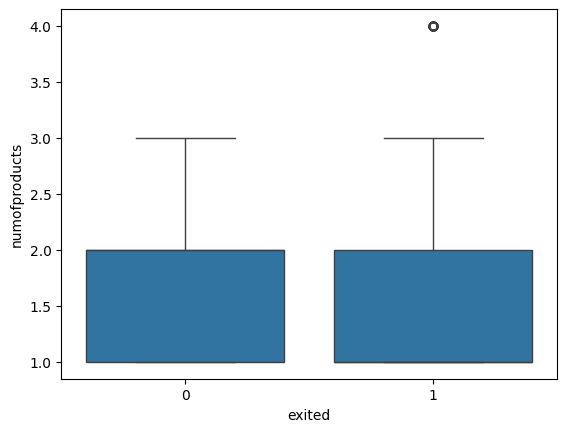

In [723]:
sns.boxplot(bank_account_df,x='exited',y='numofproducts')

In [724]:
pd.crosstab(bank_account_df['numofproducts'],bank_account_df['exited'],normalize='index')

exited,0,1
numofproducts,,
1,0.722856,0.277144
2,0.924183,0.075817
3,0.172932,0.827068
4,0.000000,1.000000


In [725]:
creditscore_churn_group = bank_account_df[bank_account_df['exited']==1]['creditscore']
creditscore_non_chrun_group = bank_account_df[bank_account_df['exited']==0]['creditscore']

<Axes: xlabel='creditscore', ylabel='Count'>

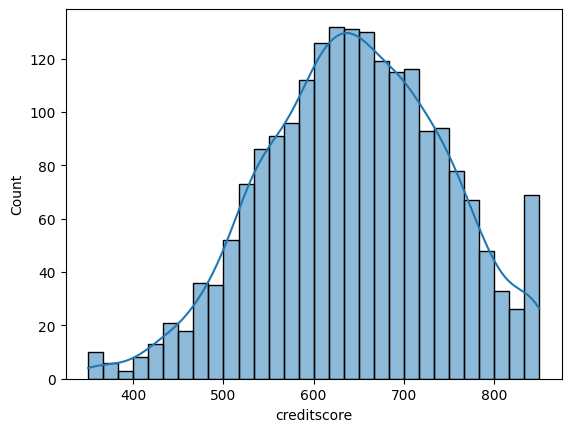

In [726]:
sns.histplot(creditscore_churn_group,bins=30,kde=True)

<Axes: xlabel='creditscore', ylabel='Count'>

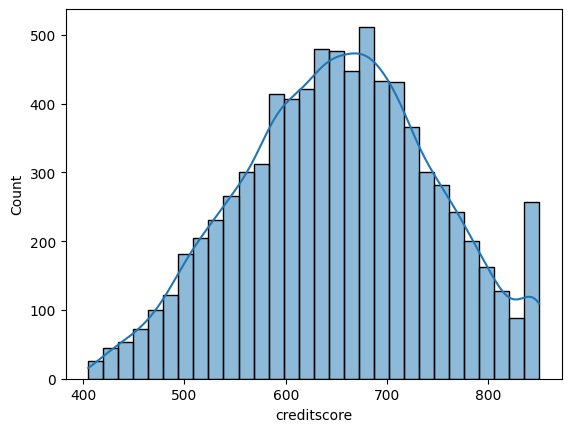

In [727]:
sns.histplot(creditscore_non_chrun_group,bins=30,kde=True)

In [728]:
print(levene(creditscore_churn_group,creditscore_non_chrun_group))

LeveneResult(statistic=np.float64(5.518728902748946), pvalue=np.float64(0.01883327725363628))


In [729]:
ttest_ind(creditscore_churn_group,creditscore_non_chrun_group,equal_var=False)

TtestResult(statistic=np.float64(-2.6346605436575796), pvalue=np.float64(0.008464728991832864), df=np.float64(3050.895535490558))

According to ttest result, lower credit score customers are more likely to churn. We need to explore why lower credit score customers are higher churn.

In [730]:
age_churn_group = bank_account_df[bank_account_df['exited']==1]['age']
age_non_churn_group = bank_account_df[bank_account_df['exited']==0]['age']

<Axes: xlabel='exited', ylabel='creditscore'>

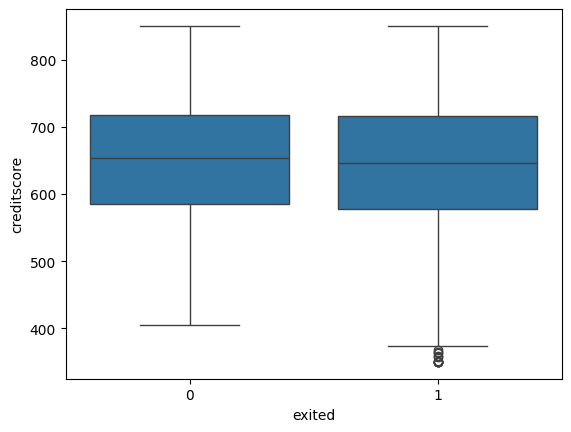

In [731]:
sns.boxplot(bank_account_df,x='exited',y='creditscore')

<Axes: xlabel='age', ylabel='Count'>

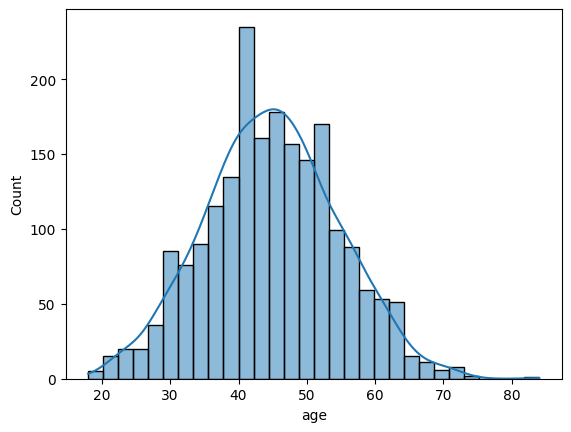

In [732]:
sns.histplot(age_churn_group,bins=30,kde=True)

<Axes: xlabel='age', ylabel='Count'>

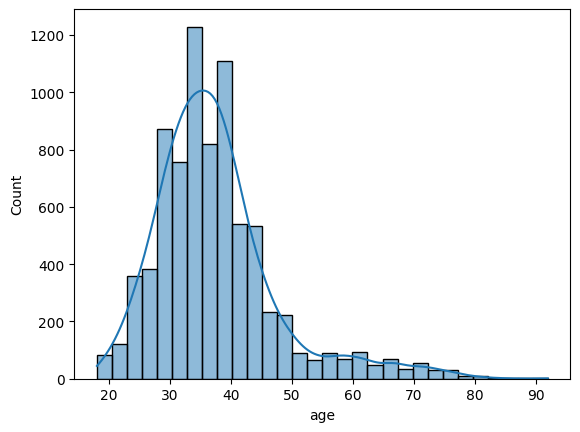

In [733]:
sns.histplot(age_non_churn_group,bins=30,kde=True)

In [734]:
levene(age_churn_group,age_non_churn_group)

LeveneResult(statistic=np.float64(13.07705907460961), pvalue=np.float64(0.000300406015901808))

In [735]:
ttest_ind(age_churn_group,age_non_churn_group,equal_var=False,alternative='two-sided')

TtestResult(statistic=np.float64(30.419446537290053), pvalue=np.float64(4.691566903677128e-179), df=np.float64(3247.9557217897677))

Old customers are morelikely to churn than younger customers. So retention plan need to focus on young customer. Marketing team should focus on digital campaign or socail media active to increse retention rate while take care of old customer to reduce churn rate by providing incentive plan or loyalty program.

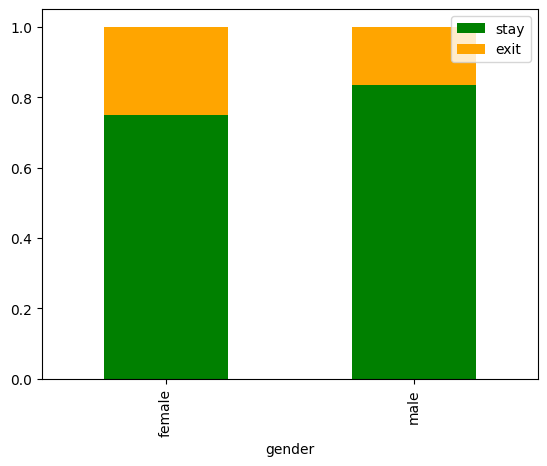

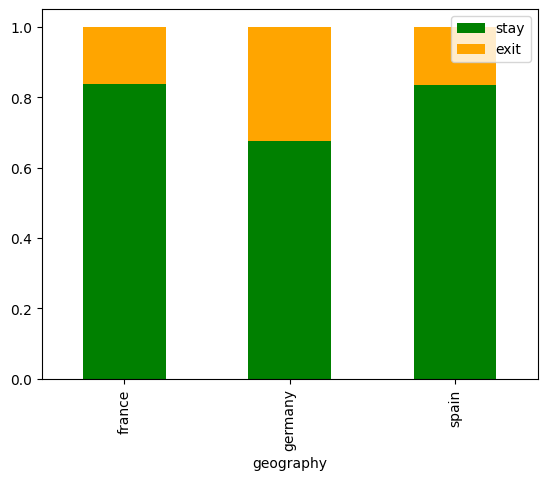

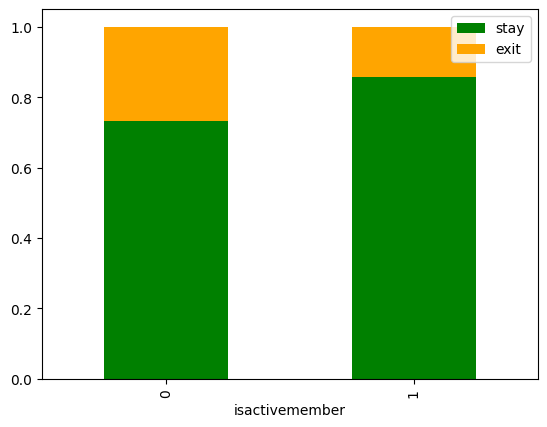

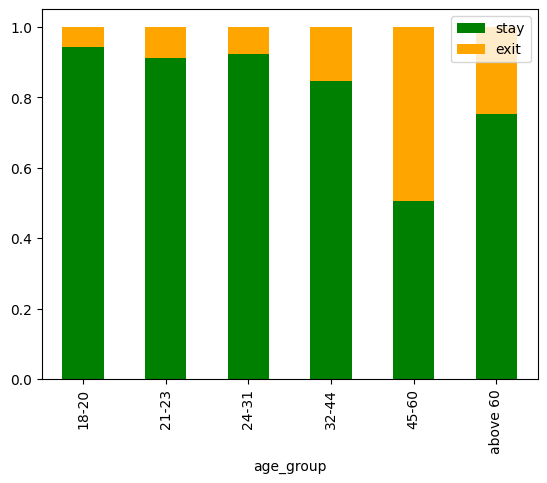

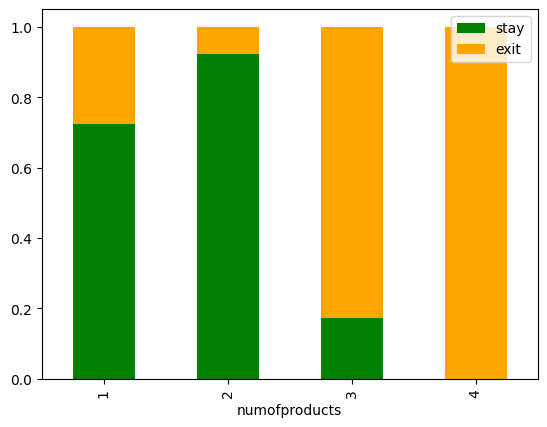

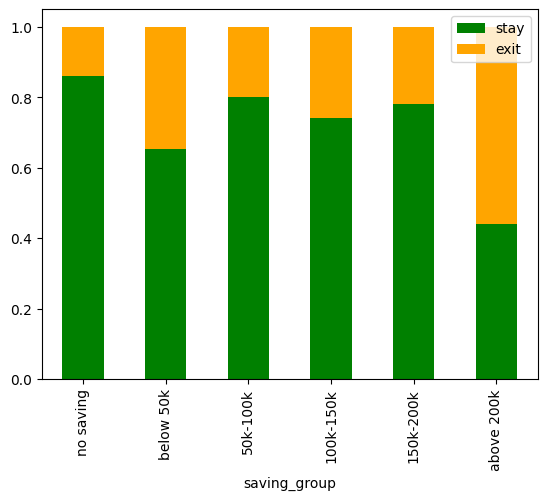

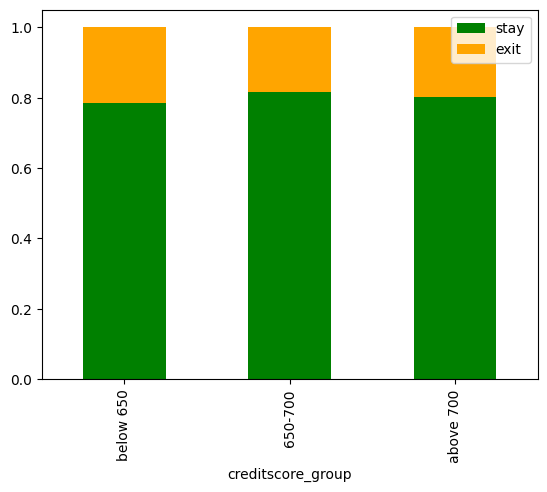

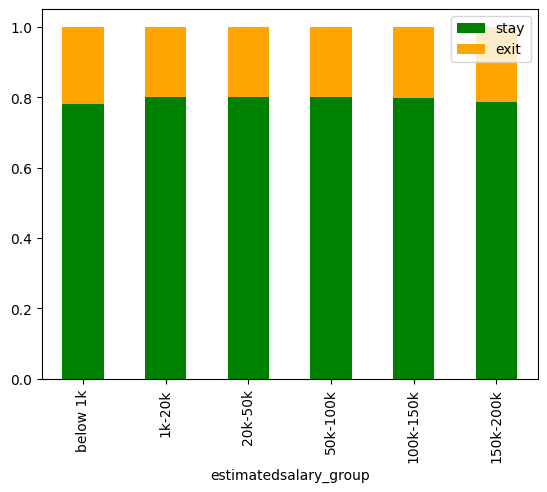

In [736]:
churn_categorical_columns = ['gender','geography','isactivemember','age_group','numofproducts', 'saving_group', 'creditscore_group','estimatedsalary_group']
for col in churn_categorical_columns:
    ct = pd.crosstab(bank_account_df[col],bank_account_df['exited'],normalize='index')
    ct.plot(kind='bar',stacked=True,color=['green','orange'])
    plt.legend(loc='upper right', labels=['stay','exit'])
    plt.show()

In [737]:
contingency_table = {}
for col in churn_categorical_columns:
    contingency_table[col] = pd.crosstab(bank_account_df[col],bank_account_df['exited'])
    display(contingency_table[col])

exited,0,1
gender,,
female,3404,1139
male,4559,898


exited,0,1
geography,,
france,4204,810
germany,1695,814
spain,2064,413


exited,0,1
isactivemember,,
0,3547,1302
1,4416,735


exited,0,1
age_group,,
18-20,84,5
21-23,215,21
24-31,1892,155
32-44,4476,812
45-60,947,929
above 60,349,115


exited,0,1
numofproducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


exited,0,1
saving_group,,
no saving,3117,500
below 50k,49,26
50k-100k,1209,300
100k-150k,2843,987
150k-200k,730,205
above 200k,15,19


exited,0,1
creditscore_group,,
below 650,3880,1057
650-700,1586,361
above 700,2497,619


exited,0,1
estimatedsalary_group,,
below 1k,46,13
1k-20k,742,185
20k-50k,1176,291
50k-100k,2032,504
100k-150k,2036,517
150k-200k,1928,527


In [738]:
from scipy.stats import chi2_contingency
chi2_results = []
for col in churn_categorical_columns:
    chi2_stats, chi2_p_val, dof, expected = (chi2_contingency(contingency_table[col]))
    chi2_results.append({'variable':col,'p_val':chi2_p_val,'stats':chi2_stats})
chi2_results = pd.DataFrame(chi2_results)
chi2_results


,variable,p_val,stats
0,gender,2.248210e-26,112.918571
1,geography,3.830318e-66,301.255337
2,isactivemember,8.785858e-55,242.985342
3,age_group,1.125215e-280,1308.096467
4,numofproducts,0.000000e+00,1503.629362
5,saving_group,1.102104e-41,201.922012
6,creditscore_group,2.030410e-02,7.793864
7,estimatedsalary_group,7.489295e-01,2.681611


According to statistical test and visual analysis, geography variable(Germany) is most influence in churn rate. Inactive customers are more likely to exit than active customers. We need to take care of providing credit plan to improve engagement and reduce churn. Female are more likely to exit than male.

In [739]:
from sklearn.preprocessing import MinMaxScaler 

In [740]:
scaler = MinMaxScaler()

In [741]:
scale_columns = ['numofproducts','creditscore','age']

In [742]:
for col in scale_columns:
        bank_account_df[col+'_scale'] = scaler.fit_transform(bank_account_df[[col]])

In [743]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,...,age,estimatedsalary,age_group,estimatedsalary_group,saving,saving_group,creditscore_group,numofproducts_scale,creditscore_scale,age_scale
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,...,42,101348.88,32-44,100k-150k,0,no saving,below 650,0.000000,0.538,0.324324
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,...,41,112542.58,32-44,100k-150k,1,50k-100k,below 650,0.000000,0.516,0.310811
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,...,42,113931.57,32-44,100k-150k,1,150k-200k,below 650,0.666667,0.304,0.324324
4,15701354,0.00,2,0,1,0,0,Boni,699,france,...,39,93826.63,32-44,50k-100k,0,no saving,650-700,0.333333,0.698,0.283784
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,...,43,79084.10,32-44,50k-100k,1,100k-150k,above 700,0.000000,1.000,0.337838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,...,39,96270.64,32-44,50k-100k,0,no saving,above 700,0.333333,0.842,0.283784
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,...,35,101699.77,32-44,100k-150k,1,50k-100k,below 650,0.000000,0.332,0.229730
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,...,36,42085.58,32-44,20k-50k,0,no saving,above 700,0.000000,0.718,0.243243
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,...,42,92888.52,32-44,50k-100k,1,50k-100k,above 700,0.333333,0.844,0.324324


In [744]:
bank_account_df['numofproducts_scale'].unique()

array([0.        , 0.66666667, 0.33333333, 1.        ])

In [745]:
bank_account_df['gender_scale'] = bank_account_df['gender'].map({'male':0,'female':1}).astype(int)

In [746]:
geography_dumnies = pd.get_dummies(bank_account_df['geography'],prefix='geography',drop_first=True)
age_group_dumnies = pd.get_dummies(bank_account_df['age_group'],prefix='age_group',drop_first=True)
numofproduct_dumnies = pd.get_dummies(bank_account_df['numofproducts'],prefix='numofprocucts',drop_first=True)
saving_group_dumnies = pd.get_dummies(bank_account_df['saving_group'],prefix='saving_group',drop_first=True)
creditscore_group_dumnies = pd.get_dummies(bank_account_df['creditscore_group'],prefix='credit_score_group',drop_first=True)

In [747]:
bank_account_df = pd.concat([bank_account_df,geography_dumnies,age_group_dumnies,numofproduct_dumnies,saving_group_dumnies,creditscore_group_dumnies],axis=1)

In [748]:
bank_account_df

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,...,numofprocucts_2,numofprocucts_3,numofprocucts_4,saving_group_below 50k,saving_group_50k-100k,saving_group_100k-150k,saving_group_150k-200k,saving_group_above 200k,credit_score_group_650-700,credit_score_group_above 700
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,...,False,False,False,False,False,False,False,False,False,False
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,...,False,False,False,False,True,False,False,False,False,False
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,...,False,True,False,False,False,False,True,False,False,False
4,15701354,0.00,2,0,1,0,0,Boni,699,france,...,True,False,False,False,False,False,False,False,True,False
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,...,True,False,False,False,False,False,False,False,False,True
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,...,False,False,False,False,True,False,False,False,False,False
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,...,False,False,False,False,False,False,False,False,False,True
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,...,True,False,False,False,True,False,False,False,False,True


In [749]:
bank_account_df.dtypes

customerid                      string[python]
balance                                float64
numofproducts                            int64
hascrcard                                int64
tenure                                   int64
isactivemember                           int64
exited                                   int64
surname                                 object
creditscore                              int64
geography                       string[python]
gender                          string[python]
age                                      int64
estimatedsalary                        float64
age_group                             category
estimatedsalary_group                 category
saving                                   int64
saving_group                          category
creditscore_group                     category
numofproducts_scale                    float64
creditscore_scale                      float64
age_scale                              float64
gender_scale 

In [750]:
creditscore_group_dumnies

,credit_score_group_650-700,credit_score_group_above 700
0,False,False
2,False,False
3,False,False
4,True,False
5,False,True
...,...,...
9996,False,True
9997,False,False
9998,False,True
9999,False,True


In [751]:
bank_account_df[geography_dumnies.columns] = bank_account_df[geography_dumnies.columns].astype(int)
bank_account_df[age_group_dumnies.columns] = bank_account_df[age_group_dumnies.columns].astype(int)
bank_account_df[numofproduct_dumnies.columns] = bank_account_df[numofproduct_dumnies.columns].astype(int)
bank_account_df[saving_group_dumnies.columns] = bank_account_df[saving_group_dumnies.columns].astype(int)
bank_account_df[creditscore_group_dumnies.columns] = bank_account_df[creditscore_group_dumnies.columns].astype(int)

In [752]:
bank_account_df   

,customerid,balance,numofproducts,hascrcard,tenure,isactivemember,exited,surname,creditscore,geography,...,numofprocucts_2,numofprocucts_3,numofprocucts_4,saving_group_below 50k,saving_group_50k-100k,saving_group_100k-150k,saving_group_150k-200k,saving_group_above 200k,credit_score_group_650-700,credit_score_group_above 700
0,15634602,0.00,1,1,2,1,1,Hargrave,619,france,...,0,0,0,0,0,0,0,0,0,0
2,15647311,83807.86,1,1,1,1,0,Hill,608,spain,...,0,0,0,0,1,0,0,0,0,0
3,15619304,159660.80,3,0,8,0,1,Onio,502,france,...,0,1,0,0,0,0,1,0,0,0
4,15701354,0.00,2,0,1,0,0,Boni,699,france,...,1,0,0,0,0,0,0,0,1,0
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,spain,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,france,...,1,0,0,0,0,0,0,0,0,1
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,france,...,0,0,0,0,1,0,0,0,0,0
9998,15584532,0.00,1,1,7,1,1,Liu,709,france,...,0,0,0,0,0,0,0,0,0,1
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,germany,...,1,0,0,0,1,0,0,0,0,1


In [753]:
bank_account_df.dtypes

customerid                      string[python]
balance                                float64
numofproducts                            int64
hascrcard                                int64
tenure                                   int64
isactivemember                           int64
exited                                   int64
surname                                 object
creditscore                              int64
geography                       string[python]
gender                          string[python]
age                                      int64
estimatedsalary                        float64
age_group                             category
estimatedsalary_group                 category
saving                                   int64
saving_group                          category
creditscore_group                     category
numofproducts_scale                    float64
creditscore_scale                      float64
age_scale                              float64
gender_scale 

In [754]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [755]:
from sklearn.linear_model import LogisticRegression

In [756]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,precision_recall_curve

In [757]:
X = bank_account_df[[#'creditscore_scale',
                    'credit_score_group_650-700',
                    'credit_score_group_above 700',
                     'age_group_21-23',
                     'age_group_24-31', 
                     'age_group_32-44',      
                     'age_group_45-60',
                     'age_group_above 60',
                     'geography_germany',
                     'geography_spain',
                     'saving_group_50k-100k',
                     'saving_group_100k-150k',
                     'saving_group_150k-200k',
                     'saving_group_below 50k',
                     'saving_group_above 200k',
                     #'isactivemember',
                     'hascrcard',
                     'numofprocucts_2',
                     'numofprocucts_3',
                     'numofprocucts_4']]

In [758]:
Y = bank_account_df['exited']

In [759]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [760]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

y_true_all = []
y_proba_exit_all = [] 
y_proba_stay_all = []
test_index_all = []
y_pred_all = []

In [761]:
for train_index, test_index in kf.split(X,Y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index],Y.iloc[test_index]
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train,Y_train)
    Y_proba = model.predict_proba(X_test)[:,1]
    Y_proba_stay = model.predict_proba(X_test)[:,0]
    Y_pred = (Y_proba >= 0.68).astype(int)

    y_true_all.extend(Y_test)
    y_proba_exit_all.extend(Y_proba)
    y_proba_stay_all.extend(Y_proba_stay)
    test_index_all.extend(test_index)
    y_pred_all.extend(Y_pred)

    accuracy_list.append(accuracy_score(Y_test,Y_pred))
    precision_list.append(precision_score(Y_test,Y_pred))
    recall_list.append(recall_score(Y_test,Y_pred))
    f1_list.append(f1_score(Y_test,Y_pred))

print(f'Avg accuracy:{np.mean(accuracy_list)}')
print(f'Avg precision:{np.mean(precision_list)}')
print(f'Avg recall:{np.mean(recall_list)}')
print(f'Avg f1:{np.mean(f1_list)}')

Avg accuracy:0.8365
Avg precision:0.6034107352665317
Avg recall:0.5778339837163367
Avg f1:0.5899465184032274


Random Forest Result

Avg accuracy: 0.8045
Avg precision: 0.5211332353936278
Avg recall: 0.4928927590692296
Avg f1 score: 0.5063631089698679

Avg accuracy: 0.7936
Avg precision: 0.49302129384711313
Avg recall: 0.4948583610348316
Avg f1 score: 0.4937306731819602

Avg accuracy: 0.8125
Avg precision: 0.5354099260494791
Avg recall: 0.6135918003565062
Avg f1 score: 0.5703360385486773

Logistic Regression Result

Avg accuracy: 0.8097999999999999
Avg precision: 0.5255370290100345
Avg recall: 0.6936888760418173
Avg f1 score: 0.5974258529983938

In [762]:
predicted_df = pd.DataFrame({
    'index' : test_index_all,
    'stay_proba' : y_proba_stay_all,
    'exit_proba' : y_proba_exit_all,
    'predicted' : y_pred_all
})
predicted_df.sort_values('index').reset_index()
bank_account_df = bank_account_df.reset_index(drop=True)
bank_account_df['stay_proba'] = np.nan
bank_account_df['exit_proba'] = np.nan
bank_account_df['predicted'] = np.nan
bank_account_df.loc[predicted_df['index'],'stay_proba'] = predicted_df['stay_proba'].values
bank_account_df.loc[predicted_df['index'],'exit_proba'] = predicted_df['exit_proba'].values
bank_account_df.loc[predicted_df['index'],'predicted'] = predicted_df['predicted'].values

In [763]:
assert np.allclose(bank_account_df.loc[predicted_df['index'],'stay_proba']+bank_account_df.loc[predicted_df['index'],'exit_proba'],1)

In [764]:
precision,recall,thresholds = precision_recall_curve(y_true_all,y_proba_exit_all)

In [765]:
precision,recall,thresholds

(array([0.2037    , 0.20376113, 0.2038019 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.81836033e-04, 4.90918017e-04, 0.00000000e+00]),
 array([0.03253636, 0.03366633, 0.03599502, ..., 0.99753772, 0.99754795,
        0.99778172]))

In [766]:
precision = precision[:-1]
recall = recall[1:]

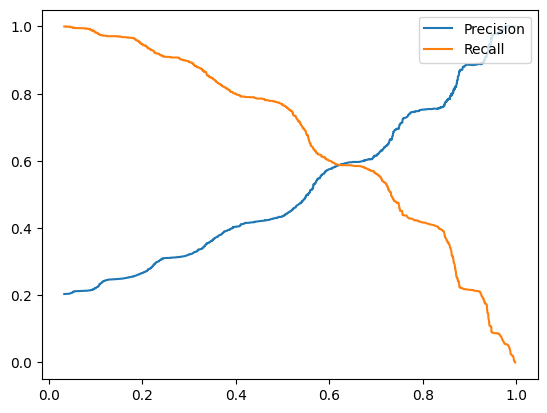

In [767]:
plt.figure(figure=(10,5))
plt.plot(thresholds,precision,label='Precision')
plt.plot(thresholds,recall,label='Recall')
plt.legend(loc='upper right')
plt.show()

In [768]:
with np.errstate(divide='ignore', invalid='ignore'):
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score[np.isnan(f1_score)] = 0
    best_threshold = thresholds[np.argmax(f1_score)]
best_threshold

np.float64(0.6430457863889342)

In [769]:
logistic_features = pd.DataFrame({
    'feature':X.columns,
    'coefficient':model.coef_[0]
}).sort_values(by='coefficient',ascending=False)
logistic_features.to_csv('feature_coefficient.csv')

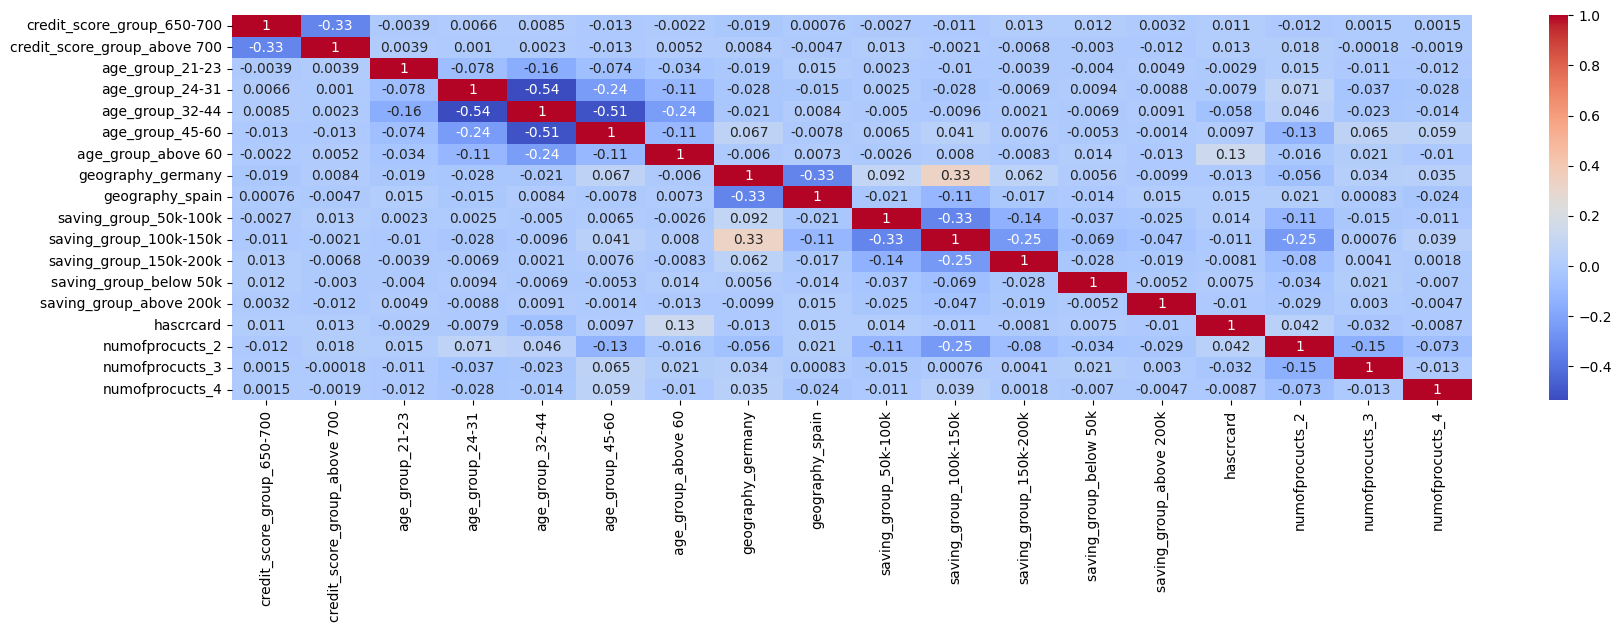

In [770]:
plt.figure(figsize=(20,5))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [771]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [772]:
from scipy.stats import randint

In [773]:
rf_accuracy_list = []
rf_precision_list = []
rf_recall_list = []
rf_f1_list = []
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rand_search = RandomizedSearchCV(rf_model,param_distributions={'n_estimators':randint(50,500),'max_depth':randint(1,20)},cv=5,n_jobs=-1,n_iter=5,random_state=42)
for train_index,test_index in kf.split(X,Y):
    rfX_train, rfX_test = X.iloc[train_index],X.iloc[test_index]
    rfY_train, rfY_test = Y.iloc[train_index],Y.iloc[test_index]

    rand_search.fit(rfX_train,rfY_train)
    best_rf = rand_search.best_estimator_
    rfY_pred = best_rf.predict(rfX_test)

    rf_accuracy_list.append(accuracy_score(rfY_test,rfY_pred))
    rf_precision_list.append(precision_score(rfY_test,rfY_pred))
    rf_recall_list.append(recall_score(rfY_test,rfY_pred))
    rf_f1_list.append(f1_score(rfY_test,rfY_pred))
    

print(f'Avg accuracy: {np.mean(rf_accuracy_list)}')
print(f'Avg precision: {np.mean(rf_precision_list)}')
print(f'Avg recall: {np.mean(rf_recall_list)}')
print(f'Avg f1 score: {np.mean(rf_f1_list)}')

Avg accuracy: 0.8097999999999999
Avg precision: 0.5255370290100345
Avg recall: 0.6936888760418173
Avg f1 score: 0.5974258529983938


Avg accuracy: 0.8097999999999999
Avg precision: 0.5255370290100345
Avg recall: 0.6936888760418173
Avg f1 score: 0.5974258529983938

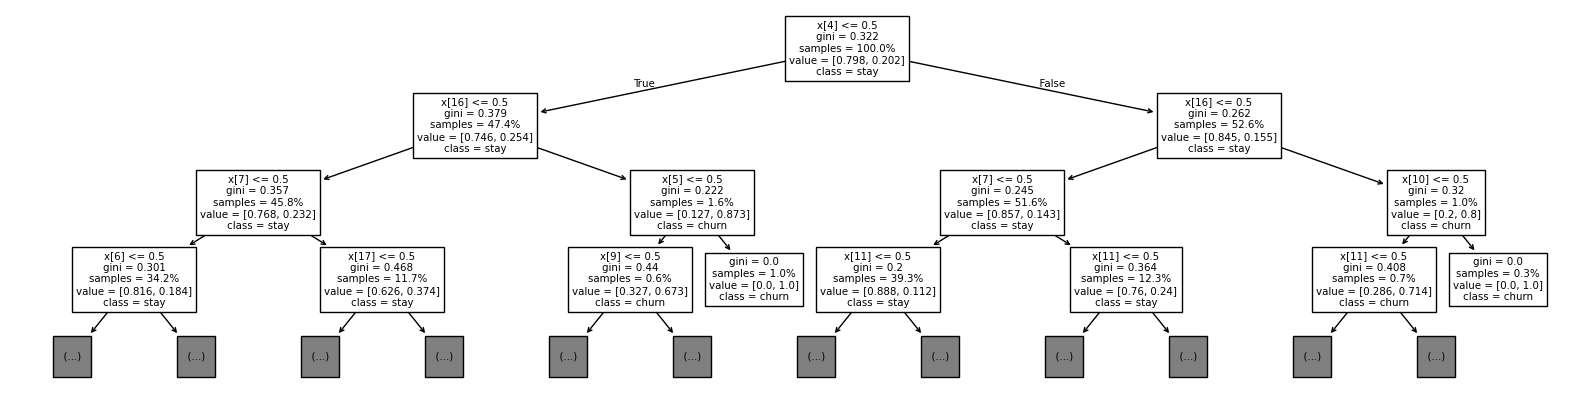

In [774]:
from sklearn.tree import plot_tree
best_rf = RandomForestClassifier()
best_rf.fit(X_train, Y_train)

plt.figure(figsize=(20,5))
plot_tree(
    best_rf.estimators_[0],
    max_depth=3,
    class_names=['stay','churn'],
    proportion=True,
    impurity=True
)
plt.show()

In [775]:
pd.DataFrame(
    {'feature':X.columns,
     'importance':best_rf.feature_importances_*100}
).sort_values(by='importance',ascending=False)

,feature,importance
5,age_group_45-60,19.539934
15,numofprocucts_2,15.752730
16,numofprocucts_3,11.559551
14,hascrcard,9.201159
7,geography_germany,6.750607
10,saving_group_100k-150k,4.835564
1,credit_score_group_above 700,3.861122
17,numofprocucts_4,3.705301
3,age_group_24-31,3.504936
4,age_group_32-44,3.478188


In [776]:
bank_account_df.to_csv('cleaned_data.csv')

In [777]:
bank_account_df.columns

Index(['customerid', 'balance', 'numofproducts', 'hascrcard', 'tenure',
       'isactivemember', 'exited', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'estimatedsalary', 'age_group',
       'estimatedsalary_group', 'saving', 'saving_group', 'creditscore_group',
       'numofproducts_scale', 'creditscore_scale', 'age_scale', 'gender_scale',
       'geography_germany', 'geography_spain', 'age_group_21-23',
       'age_group_24-31', 'age_group_32-44', 'age_group_45-60',
       'age_group_above 60', 'numofprocucts_2', 'numofprocucts_3',
       'numofprocucts_4', 'saving_group_below 50k', 'saving_group_50k-100k',
       'saving_group_100k-150k', 'saving_group_150k-200k',
       'saving_group_above 200k', 'credit_score_group_650-700',
       'credit_score_group_above 700', 'stay_proba', 'exit_proba',
       'predicted'],
      dtype='object')